## A Visual Understanding of Decision Trees and Gradient Boosting

#### Reza Bagheri

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from matplotlib.colors import ListedColormap
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier

import warnings
warnings.filterwarnings("ignore")

### Decison tree classifier

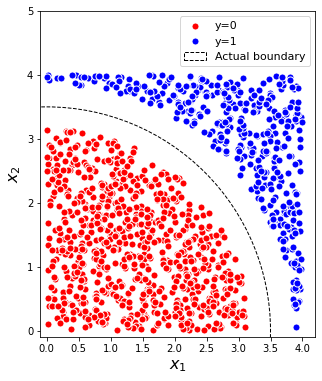

In [2]:
np.random.seed(7)  
low_r = 10  
high_r = 15
n = 1550
X = np.random.uniform(low=[0, 0], high=[4, 4], size=(n,2))
drop = (X[:, 0]**2 + X[:, 1]**2 > low_r) & (X[:, 0]**2 + X[:, 1]**2 < high_r)
X = X[~drop]
y = (X[:, 0]**2 + X[:, 1]**2 >= high_r).astype(int) 
colors = ['red', 'blue']
plt.figure(figsize=(6, 6))
for i in np.unique(y):
    plt.scatter(X[y==i, 0], X[y==i, 1], label = "y="+str(i), 
                color=colors[i], edgecolor="white", s=50)
circle = plt.Circle((0, 0), 3.5, color='black', fill=False,
                    linestyle="--", label="Actual boundary")
plt.xlim([-0.1, 4.2])
plt.ylim([-0.1, 5])
ax = plt.gca()  
ax.set_aspect('equal')
ax.add_patch(circle)
plt.xlabel('$x_1$', fontsize=16)
plt.ylabel('$x_2$', fontsize=16)
plt.legend(loc='best', fontsize=11)

plt.show()

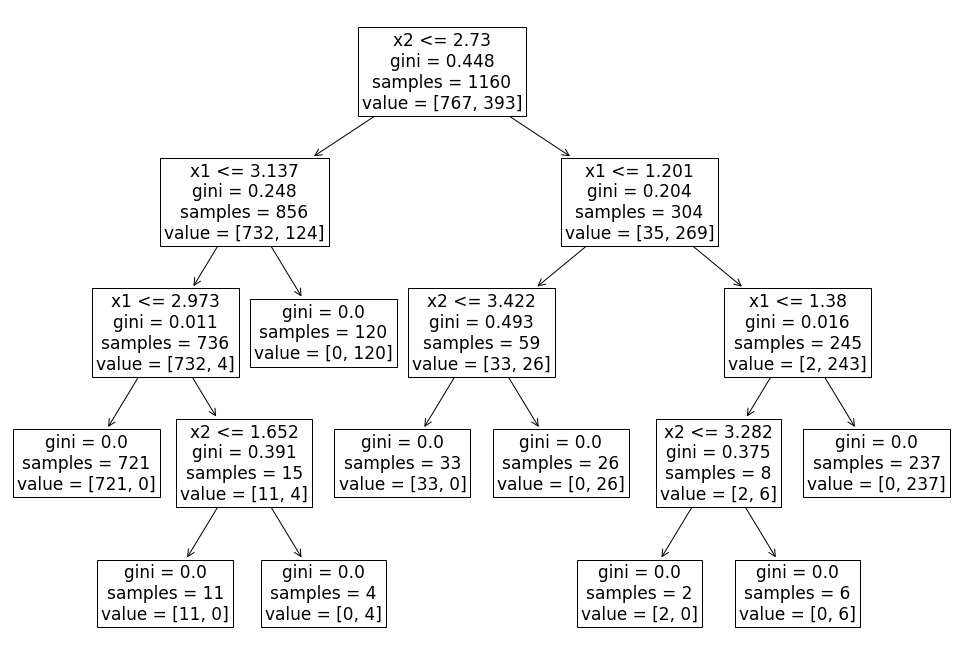

In [3]:
tree_clf = DecisionTreeClassifier(random_state=0)  
tree_clf.fit(X, y)
plt.figure(figsize=(17,12))
tree.plot_tree(tree_clf, fontsize=17, feature_names=["x1", "x2"])
plt.show()

In [4]:
tree_clf.score(X,y)

1.0

In [5]:
def plot_boundary_lines(tree_model):
    def helper(node, x1_min, x1_max, x2_min, x2_max):
        if feature[node] == 0:
            plt.plot([threshold[node], threshold[node]],
                     [x2_min, x2_max], color="black")
        if feature[node] == 1:
            plt.plot([x1_min, x1_max], [threshold[node],
                                        threshold[node]], color="black")
        if children_left[node] != children_right[node]:
            if feature[node] == 0:
                    helper(children_left[node], x1_min,
                           threshold[node], x2_min, x2_max)
                    helper(children_right[node], threshold[node],
                           x1_max, x2_min, x2_max)
            else:
                    helper(children_left[node], x1_min, x1_max,
                           x2_min, threshold[node])
                    helper(children_right[node], x1_min, x1_max,
                           threshold[node], x2_max)
    feature = tree_model.tree_.feature
    threshold = tree_model.tree_.threshold
    children_left = tree_model.tree_.children_left
    children_right = tree_model.tree_.children_right

    x1_min = x2_min = -1
    x1_max = x2_max = 5
    helper(0, x1_min, x1_max, x2_min, x2_max)

In [6]:
def plot_boundary(X, y, clf, lims):
    gx1, gx2 = np.meshgrid(np.arange(lims[0], lims[1],
                                     (lims[1]-lims[0])/300.0),
                           np.arange(lims[2], lims[3],
                                     (lims[3]-lims[2])/300.0))
    
    cmap_light = ListedColormap(['lightsalmon', 'aqua'])
            
    gx1l = gx1.flatten()
    gx2l = gx2.flatten()
    gx = np.vstack((gx1l,gx2l)).T
    gyhat = clf.predict(gx)
    gyhat = gyhat.reshape(gx1.shape)

    plt.pcolormesh(gx1, gx2, gyhat, cmap=cmap_light)
    plt.scatter(X[y==0, 0], X[y==0,1], label="y=0", alpha=0.7,
                color="red", edgecolor="white", s=50)
    plt.scatter(X[y==1, 0], X[y==1,1], label="y=1", alpha=0.7,
                color="blue", edgecolor="white", s=50)
    plt.legend(loc='upper left')

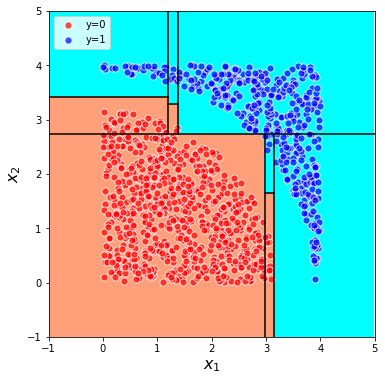

In [7]:
plt.figure(figsize=(6, 6))
plot_boundary(X, y, tree_clf, lims=[-1, 5, -1, 5])
plot_boundary_lines(tree_clf)
ax = plt.gca()  
ax.set_aspect('equal')
plt.xlim([-1, 5])
plt.ylim([-1, 5])
plt.xlabel('$x_1$', fontsize=16)
plt.ylabel('$x_2$', fontsize=16)

plt.show()

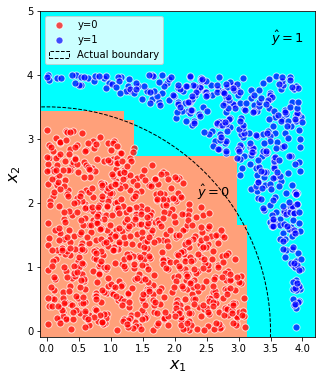

In [8]:
plt.figure(figsize=(6, 6))
plot_boundary(X, y, tree_clf, lims=[-1, 5, -1, 5])
circle = plt.Circle((0, 0), 3.5, color='black', fill=False,
                    linestyle="--", label="Actual boundary")
plt.text(3.5, 4.5, r"$\hat{y}=1$", fontsize=13)
plt.text(2.35, 2.1, r"$\hat{y}=0$", fontsize=13)
ax = plt.gca()  
ax.set_aspect('equal')
ax.add_patch(circle)
plt.xlabel('$x_1$', fontsize=16)
plt.ylabel('$x_2$', fontsize=16)
plt.xlim([-0.1, 4.2])
plt.ylim([-0.1, 5])
plt.legend(loc='upper left')

plt.show()

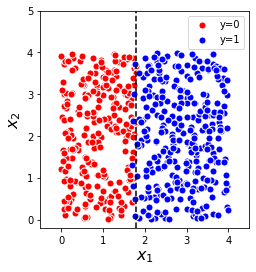

In [9]:
np.random.seed(1) 
n = 550
X1 = np.random.uniform(low=[0, 0], high=[4, 4], size=(n,2))
drop = (X1[:, 0] > 1.8) & (X1[:, 0] < 1.9)
X1 = X1[~drop]
y1 = (X1[:, 0] > 1.9).astype(int) 
X2 = np.random.uniform(low=[1.7, 0], high=[1.9, 4], size=(15,2))  
y2 = np.ones(15).astype(int)
X = np.concatenate((X1, X2), axis=0)
y = np.concatenate((y1, y2))
colors = ['red', 'blue']
for i in np.unique(y):
    plt.scatter(X[y==i, 0], X[y==i, 1], label = "y="+str(i),
                color=colors[i], edgecolor="white", s=50)
plt.axvline(x=1.8, color="black", linestyle="--")
plt.legend(loc='best')
plt.xlim([-0.5, 4.5])
plt.ylim([-0.2, 5])
ax = plt.gca()  
ax.set_aspect('equal')

plt.xlabel('$x_1$', fontsize=16)
plt.ylabel('$x_2$', fontsize=16)

plt.show()

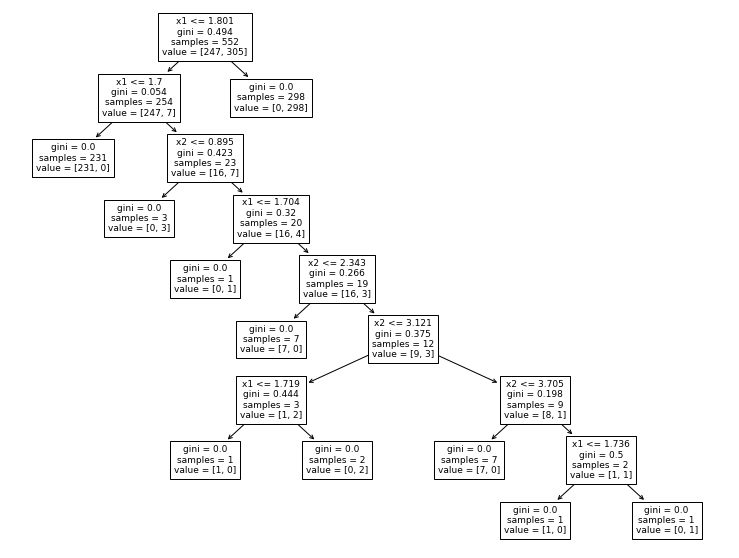

In [10]:
tree_clf = DecisionTreeClassifier(random_state=1) 
tree_clf.fit(X, y)
plt.figure(figsize=(13,10))
tree.plot_tree(tree_clf, fontsize=9, feature_names=["x1", "x2"])
plt.show()

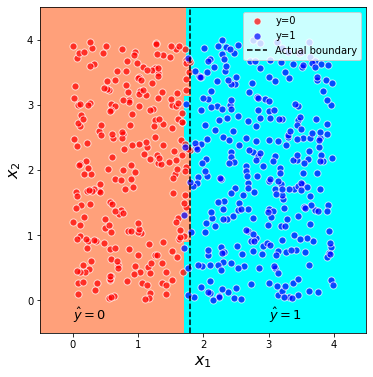

In [11]:
plt.figure(figsize=(6, 6))
plot_boundary(X, y, tree_clf, lims=[-1, 5, -1, 5])
plt.axvline(x=1.8, color="black", linestyle="--", label="Actual boundary")
plt.text(0, -0.3, r"$\hat{y}=0$", fontsize=13)
plt.text(3, -0.3, r"$\hat{y}=1$", fontsize=13)
ax = plt.gca()  
ax.set_aspect('equal')
plt.xlim([-0.5, 4.5])
plt.ylim([-0.5, 4.5])
plt.xlabel('$x_1$', fontsize=16)
plt.ylabel('$x_2$', fontsize=16)
plt.legend(loc="best")

plt.show()

In [12]:
tree_clf.get_depth()

8

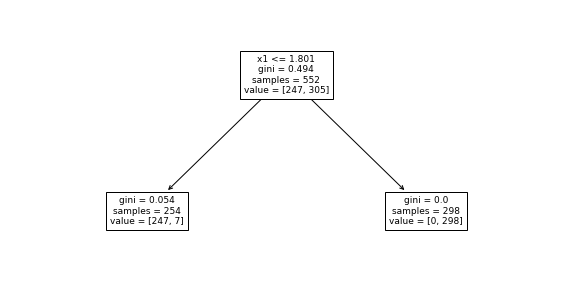

In [13]:
tree_clf1 = DecisionTreeClassifier(random_state=1, max_depth=1) 
tree_clf1.fit(X, y)
plt.figure(figsize=(10,5))
tree.plot_tree(tree_clf1, fontsize=9, feature_names=["x1", "x2"])
plt.show()

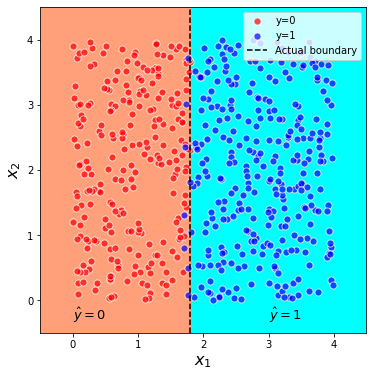

In [14]:
plt.figure(figsize=(6,6))
plot_boundary(X, y, tree_clf1, lims=[-1, 5, -1, 5])
plt.axvline(x=1.8, color="black", linestyle="--", label="Actual boundary")
plt.text(0, -0.3, r"$\hat{y}=0$", fontsize=13)
plt.text(3, -0.3, r"$\hat{y}=1$", fontsize=13)
ax = plt.gca()  
ax.set_aspect('equal')
plt.xlim([-0.5, 4.5])
plt.ylim([-0.5, 4.5])
plt.xlabel('$x_1$', fontsize=16)
plt.ylabel('$x_2$', fontsize=16)
plt.legend(loc="best")

plt.show()

### Decison tree regressor

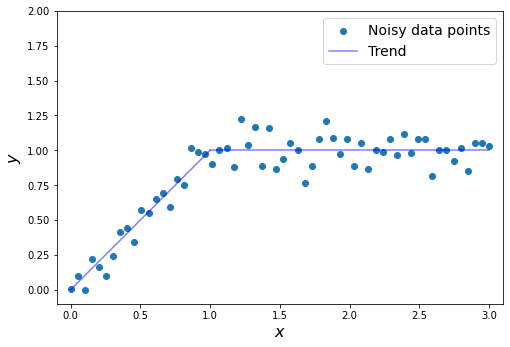

In [15]:
np.random.seed(4)
x = np.linspace(0, 3, 60)
x1 = np.linspace(0, 1, 20)
x2 = np.linspace(1, 3, 40)
y = x.copy()
y[x>=1] = 1 
y = y + np.random.normal(scale=0.1, size=60)
X = x.reshape(-1, 1)

plt.figure(figsize=(8,8))
plt.scatter(x, y, label="Noisy data points")
plt.plot(x1, x1, color="blue", alpha=0.5, label="Trend")
plt.plot(x2, len(x2)*[1], color="blue", alpha=0.5)
plt.xlim([-0.1, 3.1])
plt.ylim([-0.1, 2])
plt.xlabel('$x$', fontsize=16)
plt.ylabel('$y$', fontsize=16)
ax = plt.gca()  
ax.set_aspect('equal')
plt.legend(loc="best", fontsize=14)
plt.show()

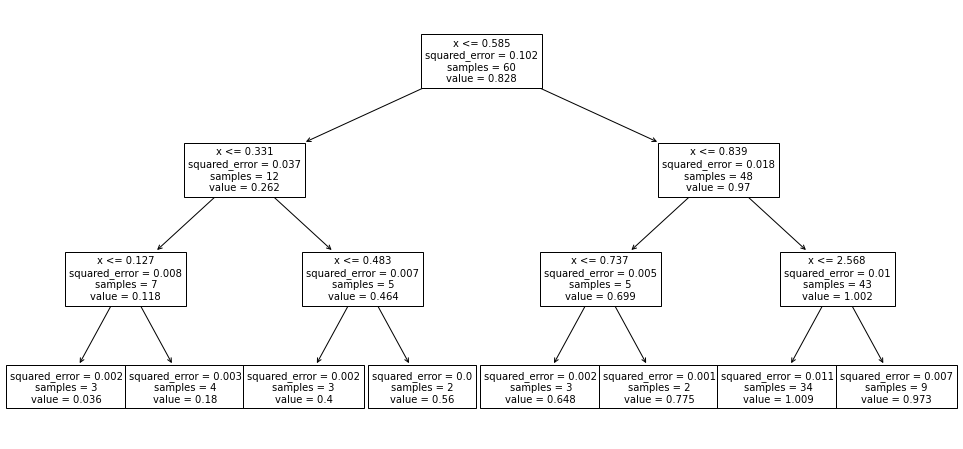

In [16]:
tree_regres = DecisionTreeRegressor(random_state=0, max_depth=3)
tree_regres.fit(X, y)
plt.figure(figsize=(17,8))
tree.plot_tree(tree_regres, fontsize=10, feature_names=["x"])
plt.show()

In [17]:
y.mean()

0.8284399100417218

In [18]:
((y.mean()-y)**2).mean()

0.10209465172918268

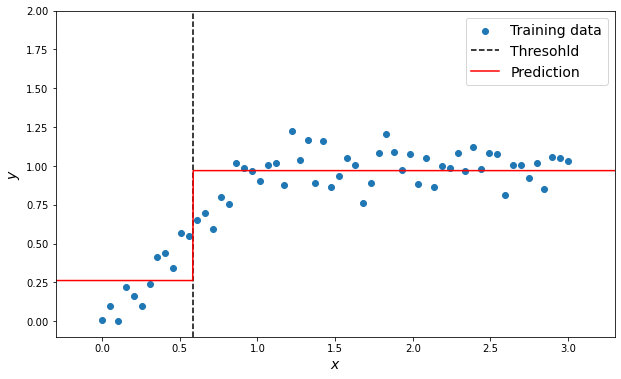

In [19]:
X_space = np.linspace(-0.3, 3.3, 1000).reshape(-1, 1)
plt.figure(figsize=(12,6))
plt.scatter(x, y, label="Training data")
plt.axvline(x=0.585, color="black", linestyle="--", label="Thresohld")
tree_regres1 = DecisionTreeRegressor(random_state=0, max_depth=1)
tree_regres1.fit(X, y)
yhat = tree_regres1.predict(X_space)
plt.plot(X_space, yhat, color="red", label="Prediction")
yhat1 = tree_regres1.predict(X)
plt.legend(loc="best", fontsize=14)
plt.xlim([-0.3, 3.3])
plt.ylim([-0.1, 2])
ax = plt.gca()  
ax.set_aspect('equal')
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.show()

In [20]:
y[(X <= 0.585).flatten()].mean()

0.2622580871960092

In [21]:
((0.262 - y[(X <= 0.585).flatten()])**2).mean()

0.036627667969105604

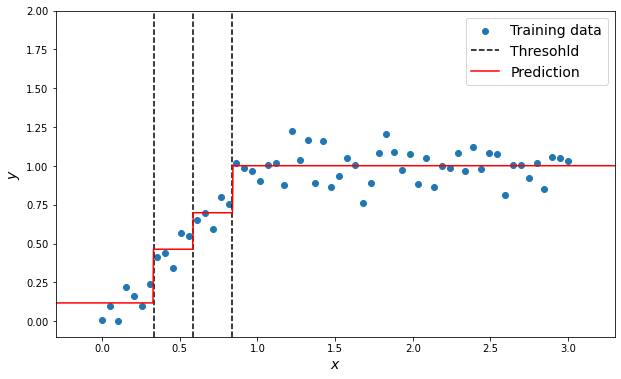

In [22]:
X_space = np.linspace(-0.3, 3.3, 1000).reshape(-1, 1)
plt.figure(figsize=(12,6))
plt.scatter(x, y, label="Training data")
plt.axvline(x=0.585, color="black", linestyle="--", label="Thresohld")
plt.axvline(x=0.331, color="black", linestyle="--")
plt.axvline(x=0.839, color="black", linestyle="--")
tree_regres2 = DecisionTreeRegressor(random_state=0, max_depth=2)
tree_regres2.fit(X, y)
yhat = tree_regres2.predict(X_space)
plt.plot(X_space, yhat, color="red", label="Prediction")
yhat1 = tree_regres2.predict(X)
plt.legend(loc="best", fontsize=14)
plt.xlim([-0.3, 3.3])
plt.ylim([-0.1, 2])
ax = plt.gca()  
ax.set_aspect('equal')
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.show()

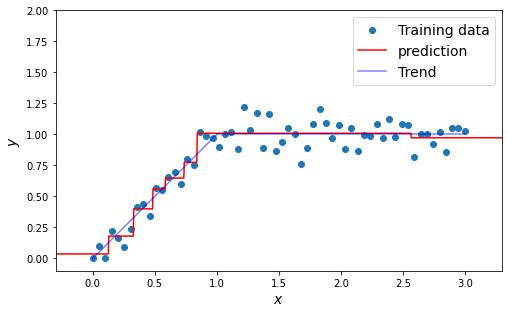

In [23]:
x1 = np.linspace(0, 1, 20)
x2 = np.linspace(1, 3, 40)
X_space = np.linspace(-0.3, 3.3, 1000).reshape(-1, 1)
yhat = tree_regres.predict(X_space)
plt.figure(figsize=(8,6))
plt.scatter(x, y, label="Training data")
plt.plot(X_space, yhat, color="red", label="prediction")
plt.plot(x1, x1, color="blue", alpha=0.5, label="Trend")
plt.plot(x2, len(x2)*[1], color="blue", alpha=0.5)
plt.legend(loc="best", fontsize=14)
plt.xlim([-0.3, 3.3])
plt.ylim([-0.1, 2])
ax = plt.gca()  
ax.set_aspect('equal')
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.show()

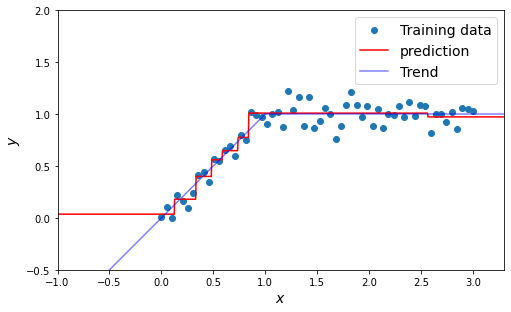

In [24]:
x1 = np.linspace(-2, 1, 20)
x2 = np.linspace(1, 4, 40)
X_space = np.linspace(-1, 3.3, 1000).reshape(-1, 1)
yhat = tree_regres.predict(X_space)
plt.figure(figsize=(8,6))
plt.scatter(x, y, label="Training data")
plt.plot(X_space, yhat, color="red", label="prediction")
plt.plot(x1, x1, color="blue", alpha=0.5, label="Trend")
plt.plot(x2, len(x2)*[1], color="blue", alpha=0.5)
plt.legend(loc="best", fontsize=14)
plt.xlim([-1, 3.3])
plt.ylim([-0.5, 2])
ax = plt.gca()  
ax.set_aspect('equal')
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.show()

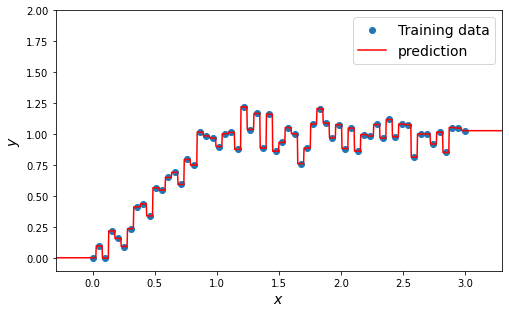

In [25]:
X_space = np.linspace(-0.3, 3.3, 1000).reshape(-1, 1)
tree_regres = DecisionTreeRegressor(random_state=1)
tree_regres.fit(X, y)
yhat = tree_regres.predict(X_space)
plt.figure(figsize=(8,6))
plt.scatter(X, y, label="Training data")
plt.plot(X_space, yhat, color="red", label="prediction")

plt.xlim([-0.3, 3.3])
plt.ylim([-0.1, 2])
plt.legend(loc="best", fontsize=14)
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
ax = plt.gca()  
ax.set_aspect('equal')
plt.show()

In [26]:
tree_regres.get_depth()

11

In [27]:
tree_regres.get_n_leaves()

60

In [28]:
tree_regres.score(X,y)

1.0

### Gradient boosting regressor

In [29]:
class GradBoostingRegressor():
    def __init__(self, num_trees, learning_rate, max_depth=1):
        self.num_trees = num_trees
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.tree_list = []
    def fit(self, X, y):
        self.F0 = y.mean() 
        Fm = self.F0
        for i in range(self.num_trees):
            tree_reg = DecisionTreeRegressor(max_depth=self.max_depth,
                                             random_state=0)
            tree_reg.fit(X, y - Fm)
            Fm += self.learning_rate * tree_reg.predict(X)
            self.tree_list.append(tree_reg)
    def predict(self, X):
        y_hat = self.F0 + self.learning_rate * \
                np.sum([t.predict(X) for t in self.tree_list], axis=0)
        return y_hat

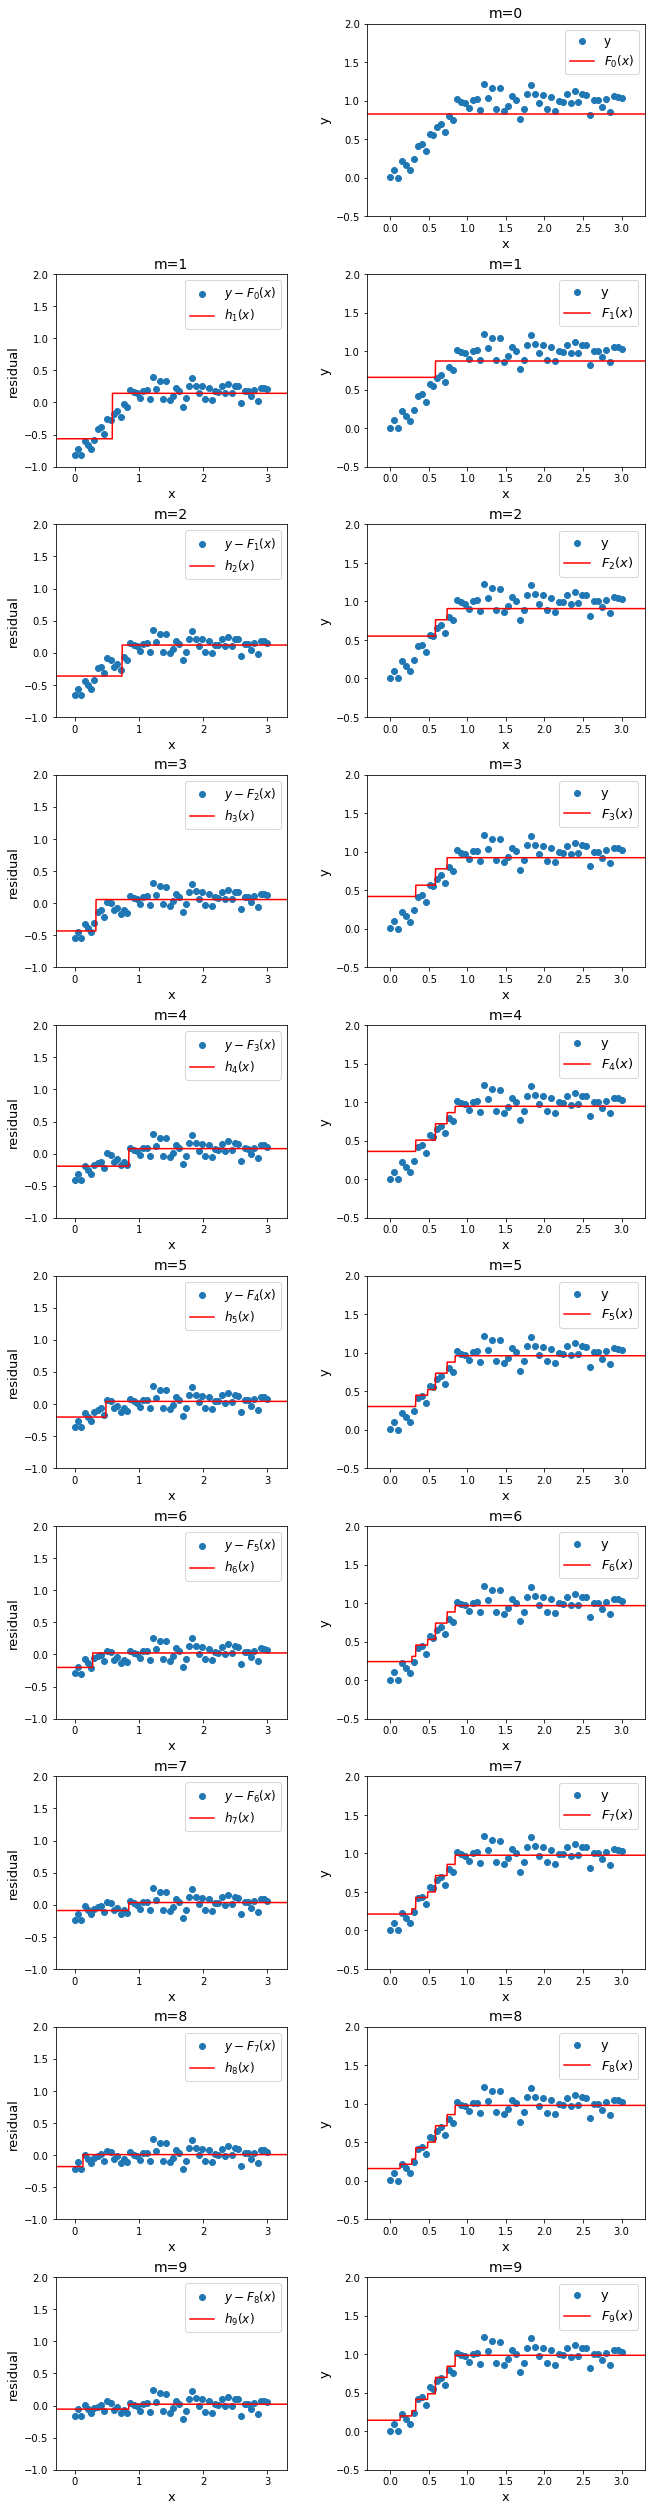

In [30]:
M = 9
X_space = np.linspace(-0.3, 3.3, 1000).reshape(-1, 1)
gbm_reg = GradBoostingRegressor(num_trees =M+1, learning_rate=0.3)
gbm_reg.fit(X, y)

fig, axs = plt.subplots(M+1, 2, figsize=(11, 45))
plt.subplots_adjust(hspace=0.3)

axs[0, 0].axis('off')
axs[0, 1].scatter(X, y, label="y")
axs[0, 1].axhline(y=gbm_reg.F0, color="red", label="$F_0(x)$")
axs[0, 1].set_title("m=0", fontsize=14)
axs[0, 1].set_xlim([-0.3, 3.3])
axs[0, 1].set_ylim([-0.5, 2])
axs[0, 1].legend(loc="best", fontsize=12)
axs[0, 1].set_aspect('equal')
axs[0, 1].set_xlabel("x", fontsize=13)
axs[0, 1].set_ylabel("y", fontsize=13)

for i in range(1, M+1):
    Fi_minus_1 = gbm_reg.F0 + gbm_reg.learning_rate * \
                 np.sum([t.predict(X) for t in gbm_reg.tree_list[:i-1]],
                        axis=0)
    axs[i, 0].scatter(X, y-Fi_minus_1, label=f"$y-F_{{{i-1}}}(x)$")
    axs[i, 0].plot(X_space, gbm_reg.tree_list[i-1].predict(X_space),
                   color="red",label=f"$h_{{{i}}}(x)$")
    axs[i, 0].set_title("m={}".format(i), fontsize=14)
    axs[i, 0].set_xlim([-0.3, 3.3])
    axs[i, 0].set_ylim([-1, 2])
    axs[i, 0].set_xlabel("x", fontsize=13)
    axs[i, 0].set_ylabel("residual", fontsize=13)
    axs[i, 0].legend(loc="best", fontsize=12)
    axs[i, 0].set_aspect('equal')
    
    axs[i, 1].scatter(X, y, label="y")
    Fi = gbm_reg.F0 + gbm_reg.learning_rate * \
         np.sum([t.predict(X_space) for t in gbm_reg.tree_list[:i]],
                axis=0)
    axs[i, 1].plot(X_space, Fi, color="red", label=f"$F_{{{i}}}(x)$")
    axs[i, 1].set_title("m={}".format(i), fontsize=14)
    axs[i, 1].set_xlim([-0.3, 3.3])
    axs[i, 1].set_ylim([-0.5, 2])
    axs[i, 1].set_xlabel("x", fontsize=13)
    axs[i, 1].set_ylabel("y", fontsize=13)
    axs[i, 1].legend(loc="best", fontsize=13)
    axs[i, 1].set_aspect('equal')
plt.show()

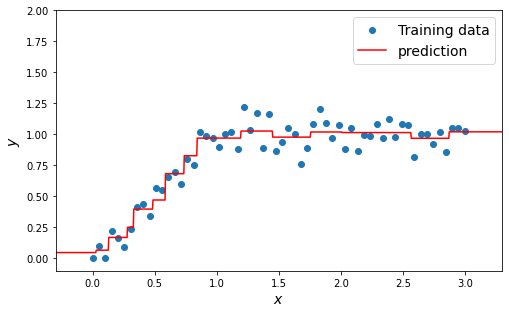

In [31]:
X_space = np.linspace(-0.3, 3.3, 1000).reshape(-1, 1)
gbm_reg = GradBoostingRegressor(num_trees =50, learning_rate=0.3)
gbm_reg.fit(X, y)
y_hat = gbm_reg.predict(X_space)

plt.figure(figsize=(8,6))
plt.scatter(x, y, label="Training data")
plt.plot(X_space, y_hat, color="red", label="prediction")

plt.xlim([-0.3, 3.3])
plt.ylim([-0.1, 2])
plt.legend(loc="best", fontsize=14)
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
ax = plt.gca()  
ax.set_aspect('equal')
plt.show()

In [32]:
gbm_reg_sklrean = GradientBoostingRegressor(n_estimators=50,
                                            learning_rate=0.3,
                                            max_depth=1)
gbm_reg_sklrean.fit(X, y)
y_hat_sklrean = gbm_reg_sklrean.predict(X_space)
np.allclose(y_hat, y_hat_sklrean)

True

### Gradient boosting classifier

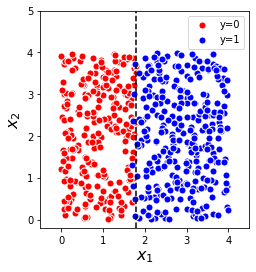

In [33]:
np.random.seed(1) 
n = 550
X1 = np.random.uniform(low=[0, 0], high=[4, 4], size=(n,2))
drop = (X1[:, 0] > 1.8) & (X1[:, 0] < 1.9)
X1 = X1[~drop]
y1 = (X1[:, 0] > 1.9).astype(int) 
X2 = np.random.uniform(low=[1.7, 0], high=[1.9, 4], size=(15,2))  
y2 = np.ones(15).astype(int)
X = np.concatenate((X1, X2), axis=0)
y = np.concatenate((y1, y2))
colors = ['red', 'blue']
for i in np.unique(y):
    plt.scatter(X[y==i, 0], X[y==i, 1], label = "y="+str(i),
                color=colors[i], edgecolor="white", s=50)
plt.axvline(x=1.8, color="black", linestyle="--")
plt.legend(loc='best')
plt.xlim([-0.5, 4.5])
plt.ylim([-0.2, 5])
ax = plt.gca()  
ax.set_aspect('equal')

plt.xlabel('$x_1$', fontsize=16)
plt.ylabel('$x_2$', fontsize=16)

plt.show()

In [34]:
class GradBoostingClassifier():  
    def __init__(self, num_trees, learning_rate, max_depth=1):
        self.num_trees = num_trees
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.tree_list = []
    def fit(self, X, y):   
        probability = y.mean()
        log_of_odds = np.log(probability / (1 - probability))
        self.F0 = log_of_odds
        Fm = np.array([log_of_odds]*len(y))
        probs = np.array([probability]*len(y))
        for i in range(self.num_trees):
            residuals = y - probs
            tree_reg = DecisionTreeRegressor(max_depth=self.max_depth) 
            tree_reg.fit(X, residuals)
            # Correcting leaf vlaues
            h = probs * (1 - probs)
            leaf_nodes = np.nonzero(tree_reg.tree_ .children_left == -1)[0]
            leaf_node_for_each_sample = tree_reg.apply(X)
            for leaf in leaf_nodes:
                leaf_samples = np.where(leaf_node_for_each_sample == leaf)[0]
                residuals_in_leaf = residuals.take(leaf_samples, axis=0)
                h_in_leaf = h.take(leaf_samples, axis=0)
                value = np.sum(residuals_in_leaf) / np.sum(h_in_leaf)
                tree_reg.tree_.value[leaf, 0, 0] = value
            
            self.tree_list.append(tree_reg)
            reg_pred = tree_reg.predict(X)
            Fm += self.learning_rate * reg_pred
            probs = np.exp(Fm) / (1+ np.exp(Fm))
    
    def predict_proba(self, X):
        FM = self.F0 + self.learning_rate * \
            np.sum([t.predict(X) for t in self.tree_list], axis=0)
        prob = np.exp(FM) / (1+ np.exp(FM))
        return prob 
    
    def predict(self, X):
        yhat = (self.predict_proba(X) >= 0.5).astype(int)
        return yhat

In [35]:
gbm_clf = GradBoostingClassifier(num_trees=30, learning_rate=0.1, max_depth=1)
gbm_clf.fit(X, y) 

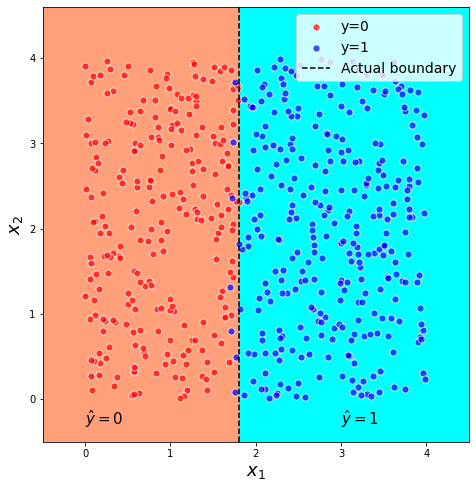

In [36]:
plt.figure(figsize=(8, 8))
plot_boundary(X, y, gbm_clf, lims=[-1, 5, -1, 5])
plt.axvline(x=1.8, color="black", linestyle="--", label="Actual boundary")
plt.text(0, -0.3, r"$\hat{y}=0$", fontsize=15)
plt.text(3, -0.3, r"$\hat{y}=1$", fontsize=15)
ax = plt.gca()  
ax.set_aspect('equal')
plt.xlim([-0.5, 4.5])
plt.ylim([-0.5, 4.6])
plt.xlabel('$x_1$', fontsize=18)
plt.ylabel('$x_2$', fontsize=18)
plt.legend(loc="best", fontsize=14)
plt.show()

In [37]:
gbm_clf_sklrean = GradientBoostingClassifier(n_estimators=30,
                                             learning_rate=0.1,
                                             max_depth=1)
gbm_clf_sklrean.fit(X, y)
phat_sklrean = gbm_clf_sklrean.predict_proba(X)[:,1]
phat = gbm_clf.predict_proba(X)
np.allclose(phat, phat_sklrean)

True